# Python for Finance
## Assignment 1

### Team:
Andrei Ranisav (2697105)

Ildar Khudayberdin (2703648)

Pedro Carlos Romero León (2710821)


### Data setup and preparation:
Loading the files and cleaning data etc. Goes here.

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy
import scipy.stats

In [7]:
crsp = pd.read_csv('crsp.csv')
crsp.dropna(inplace=True)

In [8]:
crsp.head()

,PERMNO,date,TICKER,RET,vwretd
0,10104,20060131,ORCL,0.029484,0.040041
1,10104,20060228,ORCL,-0.011933,-0.001639
2,10104,20060331,ORCL,0.102254,0.019042
3,10104,20060428,ORCL,0.065741,0.012963
4,10104,20060531,ORCL,-0.025360,-0.031041


In [51]:
ff = pd.read_csv('ff.csv')

In [55]:
ff.dateff = pd.to_datetime(ff.dateff, format='%Y%m%d')

In [9]:
print(sum(crsp.RET == 'B'),sum(crsp.RET == 'C'),sum(crsp.RET == '-66.0'),sum(crsp.RET == '-77.0'),sum(crsp.RET == '-99.0'))

0 4 0 0 0


In [15]:
crsp['retf'] = crsp.RET
crsp['retf'].replace('C',np.NaN, inplace=True)
crsp.head()

,PERMNO,date,TICKER,RET,vwretd,retf
0,10104,20060131,ORCL,0.029484,0.040041,0.029484
1,10104,20060228,ORCL,-0.011933,-0.001639,-0.011933
2,10104,20060331,ORCL,0.102254,0.019042,0.102254
3,10104,20060428,ORCL,0.065741,0.012963,0.065741
4,10104,20060531,ORCL,-0.025360,-0.031041,-0.025360


In [11]:
compdata = pd.read_csv('compdata.csv')
compdata.dropna(thresh=7,inplace=True)

In [114]:
compdata.head()

,CFOANN,CO_PER_ROL,CEOANN,TOTAL_CURR,GVKEY,YEAR,TICKER,NAICS
0,NaN,9411,CEO,950.004,1075,2006,PNW,2211
4,CFO,27518,NaN,456.263,1075,2006,PNW,2211
5,NaN,9411,CEO,950.000,1075,2007,PNW,2211
8,CFO,27518,NaN,599.999,1075,2007,PNW,2211
10,NaN,9411,CEO,950.000,1075,2008,PNW,2211


In [115]:
len(compdata)

5726

### Question 1

In [116]:
compdata_CFO = compdata[compdata.CFOANN=="CFO"].groupby('TICKER').mean() #groupeded that data based on ticker, and it only includes CFO

Text(0, 0.5, 'Frequency')

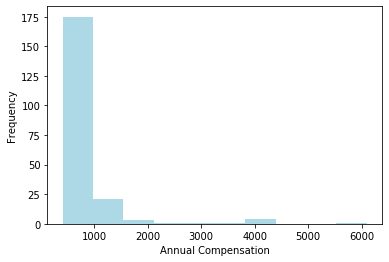

In [117]:
#AVERAGE CFO compensation per firm- histogram
fig, ax = plt.subplots()
ax.hist(compdata_CFO.TOTAL_CURR.values,color='lightblue')
ax.set_xlabel('Annual Compensation')
ax.set_ylabel('Frequency')

In [118]:
compdata_CEO = compdata[compdata.CEOANN=="CEO"].groupby('TICKER').mean() #same but for CEO

Text(0, 0.5, 'Frequency')

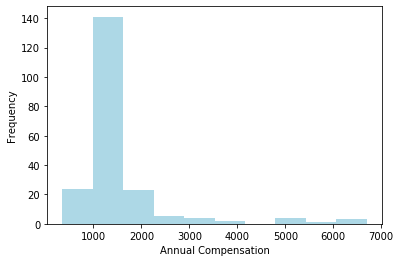

In [119]:
#AVERAGE CEO compensation per firm-histogram
fig, ax = plt.subplots()
ax.hist(compdata_CEO.TOTAL_CURR.values,color='lightblue')
ax.set_xlabel('Annual Compensation')
ax.set_ylabel('Frequency')

In [120]:
#Average CEO compensation
compdata_CEO['TOTAL_CURR'].mean()

1538.3616600042474

In [121]:
#Average CFO compensation
compdata_CFO['TOTAL_CURR'].mean()

861.9260579427015

In [122]:
#Difference between CEO&CFO returns
compdata_CEO['TOTAL_CURR'].mean() - compdata_CFO['TOTAL_CURR'].mean()

#as we can see, there is a significan difference in terms of payment to the CEO compared to CFO

676.4356020615459

Differences between the total average compensation of CEO and CFO positions among the companies listed reveals higher salaries for the CEO positions. The absolute difference in between them amounts to approx. 679.26. But median salary for CFO and CEO from total average compensation distribution is approx 689 ( almost 175 cases) and 1249.39 (almost 120 cases) respectively.

In [123]:
#Median Salary for CEO
compdata_CEO['TOTAL_CURR'].median()

1249.3899999999999

In [124]:
#Median Salary for CFO
compdata_CFO['TOTAL_CURR'].median()

688.9279285714285

In [125]:
#T-test between means
scipy.stats.ttest_rel(compdata_CEO["TOTAL_CURR"],compdata_CFO["TOTAL_CURR"])
#The CEO has a statistically higher mean than that of the CFO, proven by a larger t-statistics 

Ttest_relResult(statistic=17.410412930124757, pvalue=2.4060433824323332e-42)

In [126]:
year_CEO = compdata[compdata.CEOANN=="CEO"].groupby('YEAR').mean()
year_CFO = compdata[compdata.CFOANN=="CFO"].groupby('YEAR').mean()

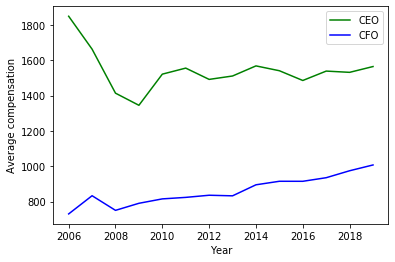

In [127]:
#Average CEO & CFO compensation per year
fig, ax = plt.subplots()
ax.plot(year_CEO.TOTAL_CURR,color='green', label='CEO')
ax.plot(year_CFO.TOTAL_CURR,color='blue', label='CFO')
ax.set_xlabel('Year')
ax.set_ylabel('Average compensation')
ax.legend()


As plotted in the graph the observations enable us to determine a greater difference in between the average compensation of CFO´s and CEO´s at the beginning of the sample. Interestingly, as time advances towards the end of the sample, we can observe that the main trend moves towards a narrowing in the salary breach in between these two corporate positions.


In [128]:
#Extracting 2 digits from the NAICS
compdata['NAICS']=compdata['NAICS'].astype(str)
compdata['industry']=compdata['NAICS'].str.slice(0,2,1)
#we NAICS from int to strings, so we can use the slice function

In [131]:
compdata.head()

,CFOANN,CO_PER_ROL,CEOANN,TOTAL_CURR,GVKEY,YEAR,TICKER,NAICS,industry
0,NaN,9411,CEO,950.004,1075,2006,PNW,2211,22
4,CFO,27518,NaN,456.263,1075,2006,PNW,2211,22
5,NaN,9411,CEO,950.000,1075,2007,PNW,2211,22
8,CFO,27518,NaN,599.999,1075,2007,PNW,2211,22
10,NaN,9411,CEO,950.000,1075,2008,PNW,2211,22


In [132]:
compdata.tail()

,CFOANN,CO_PER_ROL,CEOANN,TOTAL_CURR,GVKEY,YEAR,TICKER,NAICS,industry
16397,CFO,54990,NaN,833.846,65417,2017,YUM,722513,72
16402,NaN,37226,CEO,1244.615,65417,2018,YUM,722513,72
16403,CFO,54990,NaN,890.769,65417,2018,YUM,722513,72
16408,NaN,37226,CEO,1292.308,65417,2019,YUM,722513,72
16409,CFO,54990,NaN,984.615,65417,2019,YUM,722513,72


In [133]:
industry_CEO = compdata[compdata.CEOANN=="CEO"].groupby('industry')

In [134]:
#Adding the description(as a new column) of each industry in the table
compdata.loc[compdata.industry== "22",'Description'] ='Mining, Quarrying, and Oil and Gas Extraction'
compdata.loc[compdata.industry == "23",'Description'] ='Construction'
compdata.loc[compdata.industry == "51",'Description'] ='Information'
compdata.loc[compdata.industry == "52",'Description'] ='Finance and Insurance'
compdata.loc[compdata.industry == "54",'Description'] ='Professional, Scientific, and Technical Services'
compdata.loc[compdata.industry == "62",'Description'] ='Health Care and Social Assistance'
compdata.loc[compdata.industry == "72",'Description'] ='Accommodation and Food Services'

In [135]:
final_compdata = compdata.dropna(subset=['Description']) # we dropped the NA from the description

In [136]:
industry_CEO = final_compdata[final_compdata.CEOANN=="CEO"].groupby('Description')


In [137]:
industry_CEO['TOTAL_CURR'].describe() #We provided a description table for all the industries( the mean salary for CEO/per industry, the number of observations, the minimum salary & the max salary)

,count,mean,std,min,25%,50%,75%,max
Description,,,,,,,,
Accommodation and Food Services,55.0,1397.254473,837.444727,469.212,1145.18600,1236.0000,1339.58350,5933.333
Construction,14.0,1084.478071,122.791002,900.000,992.78875,1100.0000,1200.00000,1200.000
Finance and Insurance,474.0,1835.084302,2233.259777,0.000,975.00000,1100.0000,1494.23075,15500.000
Health Care and Social Assistance,14.0,1117.129286,131.987476,900.000,1025.29550,1081.4420,1241.17675,1335.069
Information,152.0,1531.255421,1562.466434,0.001,949.03550,1184.2215,1793.75025,17000.000
"Mining, Quarrying, and Oil and Gas Extraction",280.0,1155.278596,273.143834,0.000,1060.67500,1188.0000,1282.47300,3100.000
"Professional, Scientific, and Technical Services",54.0,1101.642463,329.743320,247.110,950.00000,1000.0000,1383.12500,2373.674


In [138]:
industry_CEO['TOTAL_CURR'].describe().unstack()[['count','max','min','mean']]

       Description                                     
count  Accommodation and Food Services                        55.000000
       Construction                                           14.000000
       Finance and Insurance                                 474.000000
       Health Care and Social Assistance                      14.000000
       Information                                           152.000000
       Mining, Quarrying, and Oil and Gas Extraction         280.000000
       Professional, Scientific, and Technical Services       54.000000
mean   Accommodation and Food Services                      1397.254473
       Construction                                         1084.478071
       Finance and Insurance                                1835.084302
       Health Care and Social Assistance                    1117.129286
       Information                                          1531.255421
       Mining, Quarrying, and Oil and Gas Extraction        1155.278596
       P

In [139]:
plot_data = final_compdata[final_compdata.CEOANN=="CEO"]

In [140]:
plot_data[plot_data.industry==21].groupby('YEAR')['TOTAL_CURR'].mean()

Series([], Name: TOTAL_CURR, dtype: float64)

Text(0, 0.5, 'Average compensation')

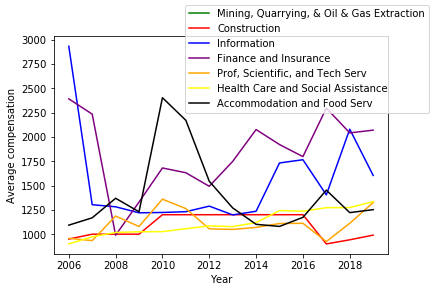

In [141]:
fig, ax = plt.subplots()
ax.plot(plot_data[plot_data.industry=="21"].groupby('YEAR')['TOTAL_CURR'].mean(),color='green',label='Mining, Quarrying, & Oil & Gas Extraction')
ax.plot(plot_data[plot_data.industry=="23"].groupby('YEAR')['TOTAL_CURR'].mean(),color='red', label ='Construction')
ax.plot(plot_data[plot_data.industry=="51"].groupby('YEAR')['TOTAL_CURR'].mean(),color='blue', label ='Information')
ax.plot(plot_data[plot_data.industry=="52"].groupby('YEAR')['TOTAL_CURR'].mean(),color='purple', label ='Finance and Insurance' )
ax.plot(plot_data[plot_data.industry=="54"].groupby('YEAR')['TOTAL_CURR'].mean(),color='orange', label = 'Prof, Scientific, and Tech Serv')
ax.plot(plot_data[plot_data.industry=="62"].groupby('YEAR')['TOTAL_CURR'].mean(),color='yellow',label = 'Health Care and Social Assistance')
ax.plot(plot_data[plot_data.industry=="72"].groupby('YEAR')['TOTAL_CURR'].mean(),color='black',label = 'Accommodation and Food Serv')

fig.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Average compensation')

The two industries that stand out as the highest paying ones are Finance and Insurance & Information
On the other hand, the least paying industry is Construction.
The rest of the industries maintain a stable trend in the middle range in terms of CEO salary

### Question 2

In [16]:
print(sum(crsp.retf == 'B'),sum(crsp.retf == 'C'),sum(crsp.retf == '-66.0'),sum(crsp.retf == '-77.0'),sum(crsp.retf == '-99.0'))

0 0 0 0 0


In [17]:
#We add column nfirm with '1'
compdata['nfirm'] = 1
#sum the data to find companies with 14 in nfirm 
a = compdata[compdata.CEOANN=='CEO'].groupby('TICKER').sum()

In [18]:
a.head()

,CO_PER_ROL,TOTAL_CURR,GVKEY,YEAR,NAICS,nfirm
TICKER,,,,,,
AAPL,209316,18563.884,23660,28175,4679080,14
ABT,194544,26103.147,15092,28175,4683140,14
ADBE,283828,14147.220,175560,28175,7254940,14
ADI,256158,13726.733,22848,28175,4681782,14
ADM,488879,24285.687,24108,28175,435708,14


In [19]:
#check len of data with nfirm = 14
len(a[a.nfirm==14].index.unique())

189

In [20]:
#total data len
len(compdata.TICKER.unique())

207

In [21]:
#we need to take a list of Tickers with representation of CEO salary for all 14 years

sample_firms = a.index.values[a.nfirm == 14]
print(sample_firms)

['AAPL' 'ABT' 'ADBE' 'ADI' 'ADM' 'ADP' 'ADSK' 'AEE' 'AEP' 'AES' 'AFL'
 'AGN' 'AIG' 'ALL' 'AMGN' 'AON' 'APA' 'APD' 'AVY' 'AXP' 'AZO' 'BA' 'BAC'
 'BAX' 'BBY' 'BDX' 'BEN' 'BK' 'BLL' 'BMY' 'BSX' 'C' 'CAH' 'CAT' 'CCL' 'CI'
 'CINF' 'CL' 'CLX' 'CMA' 'CMI' 'CMS' 'CNP' 'COP' 'COST' 'CPB' 'CSCO' 'CSX'
 'CTL' 'CVS' 'CVX' 'D' 'DE' 'DHR' 'DIS' 'DOV' 'DTE' 'DUK' 'ECL' 'ED' 'EFX'
 'EIX' 'EMN' 'EMR' 'ETN' 'ETR' 'EXC' 'F' 'FCX' 'FE' 'FITB' 'GD' 'GE' 'GLW'
 'GPC' 'GPS' 'GWW' 'HAL' 'HAS' 'HBAN' 'HD' 'HES' 'HIG' 'HON' 'HPQ' 'HSY'
 'HUM' 'IBM' 'IFF' 'INTC' 'IP' 'IPG' 'ITW' 'JCI' 'JNJ' 'JPM' 'JWN' 'K'
 'KEY' 'KLAC' 'KMB' 'KO' 'KR' 'KSS' 'L' 'LB' 'LEG' 'LIN' 'LLY' 'LMT' 'LNC'
 'LOW' 'LUV' 'M' 'MAR' 'MAS' 'MCD' 'MCK' 'MMC' 'MMM' 'MO' 'MRK' 'MRO' 'MS'
 'MSFT' 'MU' 'NEE' 'NEM' 'NOC' 'NSC' 'NTRS' 'NUE' 'NWL' 'OMC' 'OXY' 'PCAR'
 'PEG' 'PEP' 'PFE' 'PG' 'PGR' 'PH' 'PHM' 'PKI' 'PNC' 'PNW' 'PPG' 'PPL'
 'QCOM' 'RF' 'ROK' 'RTN' 'SCHW' 'SEE' 'SHW' 'SLB' 'SNA' 'SO' 'SPGI' 'SRE'
 'STT' 'SWK' 'SYY' 'T' 'TAP' 'TGT' 'TJX' 'T

In [22]:
#check the len
len(sample_firms)

189

In [23]:
#take data from whole compdata which represents tickers from sample firms list using .isin
b=compdata[compdata.TICKER.isin(sample_firms)]

In [24]:
#take data only for CEOANN == 'CEO'
d = b[b.CEOANN=='CEO']

In [26]:
d.head()

,CFOANN,CO_PER_ROL,CEOANN,TOTAL_CURR,GVKEY,YEAR,TICKER,NAICS,nfirm
0,NaN,9411,CEO,950.004,1075,2006,PNW,2211,1
5,NaN,9411,CEO,950.000,1075,2007,PNW,2211,1
10,NaN,9411,CEO,950.000,1075,2008,PNW,2211,1
17,NaN,27518,CEO,890.568,1075,2009,PNW,2211,1
23,NaN,27518,CEO,960.000,1075,2010,PNW,2211,1


In [28]:
#change format of date
crsp.date = pd.to_datetime(crsp.date, format='%Y%m%d')

#take only YEAR from date and make int from it (through string)
crsp['YEAR']=pd.to_datetime(crsp.date).dt.to_period('Y').astype('string')
crsp['YEAR']=crsp['YEAR'].astype('int')

#retc add 1 to each retf value (converted to float number with d.to_numeric)
# aslo we add column with retm for market
crsp['retc'] = pd.to_numeric(crsp.retf,downcast='float')+1
crsp['retm'] = crsp['vwretd']+1
crsp.head()

,PERMNO,date,TICKER,RET,vwretd,retf,YEAR,retc,retm
0,10104,2006-01-31,ORCL,0.029484,0.040041,0.029484,2006,1.029484,1.040041
1,10104,2006-02-28,ORCL,-0.011933,-0.001639,-0.011933,2006,0.988067,0.998361
2,10104,2006-03-31,ORCL,0.102254,0.019042,0.102254,2006,1.102254,1.019042
3,10104,2006-04-28,ORCL,0.065741,0.012963,0.065741,2006,1.065741,1.012963
4,10104,2006-05-31,ORCL,-0.025360,-0.031041,-0.025360,2006,0.974640,0.968959


In [29]:
len(crsp.date.unique())

168

In [30]:
X = 12 # Formation period 12 month = year
# Let's setup a new dataframe with our portfolios and time
unique_months = len(crsp.date.unique())
dates = crsp.date.unique()
dates = np.sort(dates)
data       = {'date': dates}
portfolios = pd.DataFrame(data)

#let's add column with YEAR for matching 
portfolios['YEAR']=pd.to_datetime(portfolios.date).dt.to_period('Y').astype('string')
portfolios['YEAR']=portfolios['YEAR'].astype(int)

# Stocks with high CEO salary 
portfolios['high_portfolio']   = ''
portfolios['high_return']      = 0.0
# Stocks to low CEO salary
portfolios['low_portfolio']  = ''
portfolios['low_return']     = 0.0
portfolios['market_return']     = 0.0
# Make sequence for rebalancing. 168 is the number of unique dates
sequence = range(0,X)
rep_seq = list(sequence)*round(((unique_months) / X)+0.5)
portfolios['m'] = rep_seq[:168]
portfolios.tail(20)

,date,YEAR,high_portfolio,high_return,low_portfolio,low_return,market_return,m
148,2018-05-31,2018,,0.0,,0.0,0.0,4
149,2018-06-29,2018,,0.0,,0.0,0.0,5
150,2018-07-31,2018,,0.0,,0.0,0.0,6
151,2018-08-31,2018,,0.0,,0.0,0.0,7
152,2018-09-28,2018,,0.0,,0.0,0.0,8
153,2018-10-31,2018,,0.0,,0.0,0.0,9
154,2018-11-30,2018,,0.0,,0.0,0.0,10
155,2018-12-31,2018,,0.0,,0.0,0.0,11
156,2019-01-31,2019,,0.0,,0.0,0.0,0
157,2019-02-28,2019,,0.0,,0.0,0.0,1


In [31]:
long_port = []
short_port = []

for index, row in portfolios.iterrows():
    if (index > 0) & (row.m == 0):
        # If we reach a rebalancing point, we rebalance portfolio
        form_sample = d[(d.YEAR < portfolios.YEAR[index]) & (d.YEAR >=portfolios.YEAR[index-X])]
        CEO_salary = form_sample.groupby(form_sample.TICKER).mean()
        ret_sort    = CEO_salary.sort_values('TOTAL_CURR',ascending=False)
        long_port = ret_sort.index.values[:10]
        short_port = ret_sort.index.values[-10:]
        portfolios.at[index, 'high_portfolio']  = ' '.join(long_port)
        portfolios.at[index, 'low_portfolio'] = ' '.join(short_port)
    elif (index > 0) & (row.m > 0):
        # After rebalancing time, portfolio stay the same till the mext point
        portfolios.at[index, 'high_portfolio']  = ' '.join(long_port)
        portfolios.at[index, 'low_portfolio'] = ' '.join(short_port)

In [32]:
portfolios.head(25)

,date,YEAR,high_portfolio,high_return,low_portfolio,low_return,market_return,m
0,2006-01-31,2006,,0.0,,0.0,0.0,0
1,2006-02-28,2006,,0.0,,0.0,0.0,1
2,2006-03-31,2006,,0.0,,0.0,0.0,2
3,2006-04-28,2006,,0.0,,0.0,0.0,3
4,2006-05-31,2006,,0.0,,0.0,0.0,4
5,2006-06-30,2006,,0.0,,0.0,0.0,5
6,2006-07-31,2006,,0.0,,0.0,0.0,6
7,2006-08-31,2006,,0.0,,0.0,0.0,7
8,2006-09-29,2006,,0.0,,0.0,0.0,8
9,2006-10-31,2006,,0.0,,0.0,0.0,9


In [33]:
portfolios.tail(25)

,date,YEAR,high_portfolio,high_return,low_portfolio,low_return,market_return,m
143,2017-12-29,2017,MS GE HON JPM C MSFT XOM PG EMR AAPL,0.0,ADI BEN COST CMS JWN PGR MU TROW JCI WBA,0.0,0.0,11
144,2018-01-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,0
145,2018-02-28,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,1
146,2018-03-29,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,2
147,2018-04-30,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,3
148,2018-05-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,4
149,2018-06-29,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,5
150,2018-07-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,6
151,2018-08-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,7
152,2018-09-28,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.0,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.0,0.0,8


In [34]:
# Now returns
for index, row in portfolios.iterrows():
    # Calculate returns
    if (len(row.high_portfolio)>0):
        # Select the portfolio values and convert string to list with .split
        hp = row.high_portfolio.split(' ')
        lp = row.low_portfolio.split(' ')
        # And this months return data 
        ret_high = crsp[(crsp.TICKER.isin(hp)) 
                                & (crsp.date == row.date)]
        ret_low= crsp[(crsp.TICKER.isin(lp)) 
                                & (crsp.date == row.date)]
        # Calc mean return and store to data frame for low_, high_ and market_return
        portfolios.at[index, 'high_return']  = ret_high.retc.mean()
        portfolios.at[index, 'low_return'] = ret_low.retc.mean()
        portfolios.at[index, 'market_return'] = ret_low.retm.mean()

In [35]:
portfolios.head(25)

,date,YEAR,high_portfolio,high_return,low_portfolio,low_return,market_return,m
0,2006-01-31,2006,,0.000000,,0.000000,0.000000,0
1,2006-02-28,2006,,0.000000,,0.000000,0.000000,1
2,2006-03-31,2006,,0.000000,,0.000000,0.000000,2
3,2006-04-28,2006,,0.000000,,0.000000,0.000000,3
4,2006-05-31,2006,,0.000000,,0.000000,0.000000,4
5,2006-06-30,2006,,0.000000,,0.000000,0.000000,5
6,2006-07-31,2006,,0.000000,,0.000000,0.000000,6
7,2006-08-31,2006,,0.000000,,0.000000,0.000000,7
8,2006-09-29,2006,,0.000000,,0.000000,0.000000,8
9,2006-10-31,2006,,0.000000,,0.000000,0.000000,9


In [37]:
#add the columns with investment for high_, low_ and market and put value 1000 in each


portfolios['investment_high'] = 1000
portfolios['investment_low'] = 1000
portfolios['investment_market'] = 1000

#starting from the point where out portfolio is not empty we multiply previous value of investment for return for each of mentioned column

for i in range(len(portfolios)):
    if len(portfolios.high_portfolio.iloc[i])>0:
        portfolios['investment_high'].iloc[i]=portfolios['investment_high'].iloc[i-1]*portfolios['high_return'].iloc[i]
        portfolios['investment_low'].iloc[i]=portfolios['investment_low'].iloc[i-1]*portfolios['low_return'].iloc[i]
        portfolios['investment_market'].iloc[i]=portfolios['investment_market'].iloc[i-1]*portfolios['market_return'].iloc[i]


In [38]:
portfolios.tail(25)

,date,YEAR,high_portfolio,high_return,low_portfolio,low_return,market_return,m,investment_high,investment_low,investment_market
143,2017-12-29,2017,MS GE HON JPM C MSFT XOM PG EMR AAPL,1.007071,ADI BEN COST CMS JWN PGR MU TROW JCI WBA,1.010990,1.012173,11,1764.227690,5224.152713,2260.989070
144,2018-01-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,1.023589,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,1.026456,1.050657,0,1805.843663,5362.360398,2375.523993
145,2018-02-28,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.955730,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.985916,0.960536,1,1725.899217,5286.837013,2281.776314
146,2018-03-29,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.964947,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.999885,0.981566,2,1665.401966,5286.228832,2239.714049
147,2018-04-30,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.995470,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,1.004328,1.004769,3,1657.857774,5309.108326,2250.395246
148,2018-05-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,1.022988,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,1.027953,1.026169,4,1695.968149,5457.514616,2309.285839
149,2018-06-29,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.995230,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.981457,1.005335,5,1687.877605,5356.313944,2321.605879
150,2018-07-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,1.046049,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,1.041483,1.031603,6,1765.603282,5578.509515,2394.975589
151,2018-08-31,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,1.016997,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,1.053059,1.030221,7,1795.612785,5874.498886,2467.354147
152,2018-09-28,2018,MS AIG C JPM PG EMR UNP AAPL XOM GE,0.996933,COST KLAC PHM ADI BEN JWN PGR TROW ADSK WBA,0.969933,1.000446,8,1790.104968,5697.871222,2468.454587


Text(0, 0.5, 'Return')

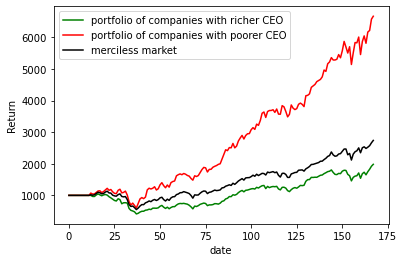

In [39]:
fig, ax = plt.subplots()
ax.plot(portfolios.investment_high.groupby[],color='green',label='portfolio of companies with richer CEO')
ax.plot(portfolios.investment_low,color='red',label='portfolio of companies with poorer CEO')
ax.plot(portfolios.investment_market,color='black',label='merciless market')

ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('Return')

In [41]:
m=int(len(portfolios))-1
print(m)

167


In [45]:
# low_portfolio: amount of investment lies in row 167. We substract 1000 to see extra
print(portfolios.investment_low.iloc[m])
portfolios.investment_low.iloc[m]- portfolios.investment_low.iloc[0]

6672.018386344305


5672.018386344305

In [46]:
# high_portfolio: amount of investment lies in row 167. We substract 1000 to see extra
print(portfolios.investment_high.iloc[m])
portfolios.investment_high.iloc[m]-portfolios.investment_high.iloc[0]


1983.0605076039037


983.0605076039037

In [48]:
# market_portfolio: amount of investment lies in row 167. We substract 1000 to see extra
print(portfolios.investment_market.iloc[m])
portfolios.investment_market[m]-portfolios.investment_market.iloc[0]

2740.1486854110262


1740.1486854110262

In [56]:
ff.head()

,dateff,mktrf,smb,hml,rf,umd
0,2006-01-31,0.0304,0.0542,0.0113,0.0035,0.0268
1,2006-02-28,-0.0030,-0.0037,-0.0025,0.0034,-0.0184
2,2006-03-31,0.0146,0.0354,0.0060,0.0037,0.0126
3,2006-04-28,0.0073,-0.0134,0.0261,0.0036,0.0061
4,2006-05-31,-0.0357,-0.0305,0.0254,0.0043,-0.0365


In [57]:
#merge data for FF with our portfolios
ap_data = pd.merge(portfolios,ff,left_on="date",right_on="dateff")
ap_data.head(25)

,date,YEAR,high_portfolio,high_return,low_portfolio,low_return,market_return,m,investment_high,investment_low,investment_market,dateff,mktrf,smb,hml,rf,umd
0,2006-01-31,2006,,0.000000,,0.000000,0.000000,0,1000.000000,1000.000000,1000.000000,2006-01-31,0.0304,0.0542,0.0113,0.0035,0.0268
1,2006-02-28,2006,,0.000000,,0.000000,0.000000,1,1000.000000,1000.000000,1000.000000,2006-02-28,-0.0030,-0.0037,-0.0025,0.0034,-0.0184
2,2006-03-31,2006,,0.000000,,0.000000,0.000000,2,1000.000000,1000.000000,1000.000000,2006-03-31,0.0146,0.0354,0.0060,0.0037,0.0126
3,2006-04-28,2006,,0.000000,,0.000000,0.000000,3,1000.000000,1000.000000,1000.000000,2006-04-28,0.0073,-0.0134,0.0261,0.0036,0.0061
4,2006-05-31,2006,,0.000000,,0.000000,0.000000,4,1000.000000,1000.000000,1000.000000,2006-05-31,-0.0357,-0.0305,0.0254,0.0043,-0.0365
5,2006-06-30,2006,,0.000000,,0.000000,0.000000,5,1000.000000,1000.000000,1000.000000,2006-06-30,-0.0035,-0.0035,0.0087,0.0040,0.0148
6,2006-07-31,2006,,0.000000,,0.000000,0.000000,6,1000.000000,1000.000000,1000.000000,2006-07-31,-0.0078,-0.0407,0.0294,0.0040,-0.0222
7,2006-08-31,2006,,0.000000,,0.000000,0.000000,7,1000.000000,1000.000000,1000.000000,2006-08-31,0.0203,0.0091,-0.0171,0.0042,-0.0346
8,2006-09-29,2006,,0.000000,,0.000000,0.000000,8,1000.000000,1000.000000,1000.000000,2006-09-29,0.0184,-0.0137,0.0004,0.0041,-0.0095
9,2006-10-31,2006,,0.000000,,0.000000,0.000000,9,1000.000000,1000.000000,1000.000000,2006-10-31,0.0323,0.0173,-0.0003,0.0041,-0.0024


In [60]:
# erh - excess return for high salary CEO
# erl - excess return for low salary CEO
ap_data['erh'] = ap_data['high_return'] - ap_data['rf']
ap_data['erl'] = ap_data['low_return'] - ap_data['rf']
ap_data.head(25)

,date,YEAR,high_portfolio,high_return,low_portfolio,low_return,market_return,m,investment_high,investment_low,investment_market,dateff,mktrf,smb,hml,rf,umd,erh,erl
0,2006-01-31,2006,,0.000000,,0.000000,0.000000,0,1000.000000,1000.000000,1000.000000,2006-01-31,0.0304,0.0542,0.0113,0.0035,0.0268,-0.003500,-0.003500
1,2006-02-28,2006,,0.000000,,0.000000,0.000000,1,1000.000000,1000.000000,1000.000000,2006-02-28,-0.0030,-0.0037,-0.0025,0.0034,-0.0184,-0.003400,-0.003400
2,2006-03-31,2006,,0.000000,,0.000000,0.000000,2,1000.000000,1000.000000,1000.000000,2006-03-31,0.0146,0.0354,0.0060,0.0037,0.0126,-0.003700,-0.003700
3,2006-04-28,2006,,0.000000,,0.000000,0.000000,3,1000.000000,1000.000000,1000.000000,2006-04-28,0.0073,-0.0134,0.0261,0.0036,0.0061,-0.003600,-0.003600
4,2006-05-31,2006,,0.000000,,0.000000,0.000000,4,1000.000000,1000.000000,1000.000000,2006-05-31,-0.0357,-0.0305,0.0254,0.0043,-0.0365,-0.004300,-0.004300
5,2006-06-30,2006,,0.000000,,0.000000,0.000000,5,1000.000000,1000.000000,1000.000000,2006-06-30,-0.0035,-0.0035,0.0087,0.0040,0.0148,-0.004000,-0.004000
6,2006-07-31,2006,,0.000000,,0.000000,0.000000,6,1000.000000,1000.000000,1000.000000,2006-07-31,-0.0078,-0.0407,0.0294,0.0040,-0.0222,-0.004000,-0.004000
7,2006-08-31,2006,,0.000000,,0.000000,0.000000,7,1000.000000,1000.000000,1000.000000,2006-08-31,0.0203,0.0091,-0.0171,0.0042,-0.0346,-0.004200,-0.004200
8,2006-09-29,2006,,0.000000,,0.000000,0.000000,8,1000.000000,1000.000000,1000.000000,2006-09-29,0.0184,-0.0137,0.0004,0.0041,-0.0095,-0.004100,-0.004100
9,2006-10-31,2006,,0.000000,,0.000000,0.000000,9,1000.000000,1000.000000,1000.000000,2006-10-31,0.0323,0.0173,-0.0003,0.0041,-0.0024,-0.004100,-0.004100


In [62]:
# OLS for high. Restrict data to portfolios with return higher than 0
ffh = ols("erh ~ mktrf + smb + hml + umd", ap_data.loc[ap_data.high_return>0])
esth  = ffh.fit()
esth.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    erh   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     226.0
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.19e-62
Time:                        13:06:30   Log-Likelihood:                 393.86
No. Observations:                 156   AIC:                            -777.7
Df Residuals:                     151   BIC:                            -762.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9981      0.002    616.791      0.000       0.995       1.001
mktrf          1.0396      0.041     25.060      0.000       0.958       1.122
smb           -0.1187      0.074     -1.598      0.112      -0.265       0.028
hml            0.2926      0.067      4.382      0.000       0.161       0.424
umd           -0.0287      0.040     -0.726      0.469      -0.107       0.049
==============================================================================
Omnibus:                        7.149   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.028   Jarque-Bera (JB):               12.793
Skew:                          -0.009   Prob(JB):                      0.00167
Kurtosis:                       4.403   Cond. No.                         48.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#OLS for low. Restrict data to portfolios with return higher than 0
ffl = ols("erl ~ mktrf + smb + hml + umd", ap_data.loc[ap_data.high_return>0])
estl  = ffl.fit()
estl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    erl   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     144.9
Date:                Wed, 23 Sep 2020   Prob (F-statistic):           1.23e-50
Time:                        13:06:20   Log-Likelihood:                 345.61
No. Observations:                 156   AIC:                            -681.2
Df Residuals:                     151   BIC:                            -666.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0062      0.002    456.330      0.000       1.002       1.011
mktrf          1.0626      0.057     18.799      0.000       0.951       1.174
smb           -0.0371      0.101     -0.367      0.714      -0.237       0.163
hml            0.2908      0.091      3.197      0.002       0.111       0.471
umd           -0.1484      0.054     -2.754      0.007      -0.255      -0.042
==============================================================================
Omnibus:                       95.327   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.141
Skew:                           2.023   Prob(JB):                    1.86e-189
Kurtosis:                      13.833   Cond. No.                         48.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# From both regressions we can see that t-value is significant for market riskfree rate (mktrf), intercept and 
# hml (High Book to market minus Low book to market). Momentum is also looks important for low portfolios returns.
# Intercept (in another words - alpha) of each regression is high and
# have substantial t-value and it means that Fama French factors do not perform well in explaining the returns of portfolio.
# We think, this alpha can (at least partly) be explained by influence of CEO salary diffrence on return.